---
# Title: 'Google Data Analytics Capstone Project: Bellabeat'
## Author: "Stephen Garsheya Christopher"
## Date: 5 June 2024

---



This document details my capstone project from the Google Data Analytics Course. The case study focuses on Bellabeat, a high-tech company that creates health products for women. In this project, I will follow the data analysis steps: ask, prepare, process, analyze, share, and act, to answer important business questions.

### Introducttion

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company that has the potential to become a larger player in the global smart device market. Urška Sršen, co-founder and Chief Creative Officer of Bellabeat believes that analysing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyse smart device data to gain insight into how consumers are using their smart devices. The insights I discover will guide the marketing strategy for the company. I will present my analysis to the Bellabeat executive team and my high-level recommendations for Bellabeat’s marketing strategy.

### About The Company

Bellabeat is a high-tech company that makes smart and stylish health products for women. These products track activity, sleep, stress, and reproductive health, giving women valuable insights into their wellness. Since starting in 2013, Bellabeat has quickly grown and become a leader in tech-driven wellness for women. By 2016, the company had opened offices around the world and released several new products.

### products

* Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

* Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

* Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

* Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

## Phase 1: Ask

### Business Task

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy.

### Key Stakeholders

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy

### Deliverables

* Clear summary of the business task.
* Description of the data source.
* ETL (Extratct, Transform and Load) process on the data.
* Clear summary of data analysis.
* Prepare data visualization.
* Recommendations based on the insights

## Phase 2: Prepare

### Dataset

The data used for this case study is Fitbit Fitness Tracker data, stored in Kaggle and made available through Mobius <https://www.kaggle.com/arashnic>. The data can be accessed here <https://www.kaggle.com/datasets/arashnic/fitbit>

### Data Organisation

Altogether, 18 CSV files include the data for analysis. They have been stored in a long format, as each row is representative of a single observation, with each user having a unique ID.

### Data Credibility

In this analysis, we'll use the ROCCC framework to evaluate the bias and credibility of the dataset.

* R (Reliable): The reliability of this data is questionable due to the lack of information about the margin of error. Additionally, the small sample size of only 30 participants limits the depth of analysis possible.

* O (Originality): The data set is not original. It was collected from respondents through a survey on Amazon Mechanical Turk between December 3, 2016, and December 5, 2016.

* C (Comprehensiveness): There is no demographic information about the users in the dataset. Therefore, if the data is biased, any insights will be unfair to various user types. In conclusion, the data is not comprehensive.

* C (Current): The data is outdated, as it was last updated three years ago. Therefore, it does not reflect current trends in the smart device market.

* C (Cited): As mentioned earlier, the dataset was created using Amazon Mechanical Turk. However, its credibility is uncertain due to the lack of information about the source's reliability.

In summary, the current dataset lacks sufficient data integrity and credibility. While it offers some insights into the business problem, more records and further analysis are necessary to ensure reliability and reduce bias.

Licensing CC0: Public Domain

## Phase 3: Process

I choose to use R for my analysis due to accessibility, the amount of data I will be working with, and being able to create data visualization to share my results and recommendations with stakeholders.

### Loading Packages

Packages to be used for my analysis includes;

* tidyverse
* here
* skimr
* janitor
* lubridate
* ggplot2
* readr

In [1]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(readr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Importing Datast

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
weight_info <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heart_rate <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")


### Previewing Dataset

In [3]:
head(daily_activity)
head(daily_calories)
head(daily_intensities)
head(daily_sleep)
head(daily_steps)
head(hourly_calories)
head(hourly_intensities)
head(hourly_steps)
head(weight_info)
head(heart_rate)
                        
colnames(daily_activity)
colnames(daily_calories)
colnames(daily_intensities)
colnames(daily_sleep)
colnames(daily_steps)
colnames(hourly_calories)
colnames(hourly_intensities)
colnames(hourly_steps)
colnames(weight_info)
colnames(heart_rate)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"          "ActivityDay" "Calories"

[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"          "ActivityDay" "StepTotal"

[1] "Id"           "ActivityHour" "Calories"

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

[1] "Id"           "ActivityHour" "StepTotal"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"    "Time"  "Value"


From my preview, I observed that the daily_activities dataset aggregates data from the daily_steps, daily_calories, and daily_intensities datasets. Therefore, I will proceed with my analysis using the daily_activities dataset and exclude the daily_steps, daily_calories, and daily_intensities datasets.

### Check the Structure of the Dataset

In [4]:
str(daily_activity)
str(daily_sleep)
str(hourly_calories)
str(hourly_intensities)
str(hourly_steps)
str(weight_info)
str(heart_rate)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 


### Cleaning and Formatting

At this stage, I checked for and fixed inconsistencies, errors, duplicates, outliers, and missing data. This ensured seamless usage and enriched the data for proper analysis.

### Check the total number of Participants

I made sure i checked the number of unique users per data frame before starting the cleaning process.

In [5]:
n_unique(daily_activity$Id)
n_unique(daily_sleep$Id)
n_unique(hourly_calories$Id)
n_unique(hourly_intensities$Id)
n_unique(hourly_steps$Id)
n_unique(weight_info$Id)
n_unique(heart_rate$Id)

[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

[1] 8

[1] 14

All datasets have 33 participants each, except for the daily_sleep dataset, which has 24 participants,the heart_rate dataset which have 14 participants and the weight_log dataset, which has only 8 participants. Due to the insufficient sample size of the weight_log dataset and the heart_rate dataset, I will exclude it from my analysis

### Check for duplicates

In [6]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

### Removing all duplicates, missing and zero values

In [7]:
daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na() %>% 
  filter(TotalSteps !=0)%>% filter(TotalDistance !=0)
daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na() %>% 
  filter(TotalSleepRecords !=0)
hourly_calories_ <- hourly_calories %>%
  distinct() %>%
  drop_na() %>% 
  filter(Calories !=0)
hourly_intensities_ <- hourly_intensities %>%
  distinct() %>%
  drop_na() %>% 
  filter(TotalIntensity !=0)
hourly_steps_ <- hourly_steps %>%
  distinct() %>%
  drop_na() %>% 
  filter(StepTotal !=0)

### Making Date and Time columns consistent

I made the date-time format for the daily_activity and daily_sleep datasets consistent before merging them. For the daily_sleep dataset, I disregarded the time component and used as_date instead of as_date_time. I converted the date strings to date_time format for the hourly_calories, hourly_intensities, and hourly_steps datasets.

In [8]:
daily_activity <- daily_activity %>%
  rename(date = ActivityDate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>%
  rename(date = SleepDay) %>%
  mutate(date = as_date(date, format ="%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone()))

hourly_calories <- hourly_calories %>% 
  rename(date_time = ActivityHour) %>% 
  mutate(date_time = as.POSIXct(date_time, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

hourly_intensities <- hourly_intensities %>% 
  rename(date_time = ActivityHour) %>% 
  mutate(date_time = as.POSIXct(date_time, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

hourly_steps<- hourly_steps %>% 
  rename(date_time = ActivityHour) %>% 
  mutate(date_time = as.POSIXct(date_time, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz =
  Sys.timezone())`.
Caused by warning:
! `tz` argument is ignored by `as_date()`”


### Clean and Rename columns

In [9]:
clean_names(daily_activity)
daily_activity <- rename_with(daily_activity, tolower)

clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)

clean_names(hourly_calories)
hourly_calories <- rename_with(hourly_calories, tolower)

clean_names(hourly_intensities)
hourly_intensities <- rename_with(hourly_intensities, tolower)

clean_names(hourly_steps)
hourly_steps <- rename_with(hourly_steps, tolower)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<int>,<int>,<int>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320
1503960366,2016-04-20,1,360,377
1503960366,2016-04-21,1,325,364
1503960366,2016-04-23,1,361,384


id,date_time,calories
<dbl>,<dttm>,<int>
1503960366,2016-04-12 00:00:00,81
1503960366,2016-04-12 01:00:00,61
1503960366,2016-04-12 02:00:00,59
1503960366,2016-04-12 03:00:00,47
1503960366,2016-04-12 04:00:00,48
1503960366,2016-04-12 05:00:00,48
1503960366,2016-04-12 06:00:00,48
1503960366,2016-04-12 07:00:00,47
1503960366,2016-04-12 08:00:00,68


id,date_time,total_intensity,average_intensity
<dbl>,<dttm>,<int>,<dbl>
1503960366,2016-04-12 00:00:00,20,0.333333
1503960366,2016-04-12 01:00:00,8,0.133333
1503960366,2016-04-12 02:00:00,7,0.116667
1503960366,2016-04-12 03:00:00,0,0.000000
1503960366,2016-04-12 04:00:00,0,0.000000
1503960366,2016-04-12 05:00:00,0,0.000000
1503960366,2016-04-12 06:00:00,0,0.000000
1503960366,2016-04-12 07:00:00,0,0.000000
1503960366,2016-04-12 08:00:00,13,0.216667


id,date_time,step_total
<dbl>,<dttm>,<int>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0
1503960366,2016-04-12 06:00:00,0
1503960366,2016-04-12 07:00:00,0
1503960366,2016-04-12 08:00:00,250


### Merging datasets

In [10]:
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("id", "date"))
hourly_activity <- merge(hourly_steps, hourly_intensities, by=c ("id", "date_time"))
hourly_activity <- merge(hourly_activity, hourly_calories, by=c ("id", "date_time"))

## Phase 4 and 5: Analyse and Share

I analyzed trends of the users of FitBit and determined if that can help me on BellaBeat’s marketing strategy.

### Summarize datasets

In [11]:
daily_activity_sleep %>%  
  select(totalsteps,
         totaldistance,
         totalminutesasleep,
         totaltimeinbed,
         sedentaryminutes, calories) %>%
  summary()
hourly_activity %>%  
  select(steptotal,
         totalintensity,
        calories) %>%
  summary()

   totalsteps    totaldistance    totalminutesasleep totaltimeinbed 
 Min.   :   17   Min.   : 0.010   Min.   : 58.0      Min.   : 61.0  
 1st Qu.: 5189   1st Qu.: 3.592   1st Qu.:361.0      1st Qu.:403.8  
 Median : 8913   Median : 6.270   Median :432.5      Median :463.0  
 Mean   : 8515   Mean   : 6.012   Mean   :419.2      Mean   :458.5  
 3rd Qu.:11370   3rd Qu.: 8.005   3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :22770   Max.   :17.540   Max.   :796.0      Max.   :961.0  
 sedentaryminutes    calories   
 Min.   :   0.0   Min.   : 257  
 1st Qu.: 631.2   1st Qu.:1841  
 Median : 717.0   Median :2207  
 Mean   : 712.1   Mean   :2389  
 3rd Qu.: 782.8   3rd Qu.:2920  
 Max.   :1265.0   Max.   :4900  

   steptotal       totalintensity      calories     
 Min.   :    0.0   Min.   :  0.00   Min.   : 42.00  
 1st Qu.:    0.0   1st Qu.:  0.00   1st Qu.: 63.00  
 Median :   40.0   Median :  3.00   Median : 83.00  
 Mean   :  320.2   Mean   : 12.04   Mean   : 97.39  
 3rd Qu.:  357.0   3rd Qu.: 16.00   3rd Qu.:108.00  
 Max.   :10554.0   Max.   :180.00   Max.   :948.00  

### Insights from the summary

* Average total steps is 8515 in a day. The daily recommended amount of steps to be taken per day is 7500
* Sedentary minutes on a average is 712(~12 hours).
* Participants sleep for an average of 419 minutes (~7 hours).
* An average of 2389 calories is burned per day.
* Participants spend an average of 39 minutes in bed before sleeping.
* Participants burn an average of 117 calories hourly and 2389 calories daily


### classification of users per activity level

I divided the users into different categories based on their activity level (number of steps taken per day) to identify how active/sedentary the study participants are.

I first determined the average daily steps taken by users


In [12]:
daily_average <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(meandailysteps = mean(totalsteps), meandailycalories = mean(calories), meandailysleep = mean(totalminutesasleep))

head(daily_average)

id,meandailysteps,meandailycalories,meandailysleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000



Having mean daily steps, i split users into the following groups:

* sedentary, less than 5,000 steps per day;
* lightly active, 5,000 - 7,499 steps;
* fairly active, 7,500 - 9,999 steps;
* active, 10,000 - 12,499 steps;
* highly active, 12,500 & more.
Classifications are based on a medical article from MedicineNet:
<https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm>

In [13]:
daily_user_average <- daily_average %>% 
  mutate(userclass = case_when(
    meandailysteps < 5000 ~ "sedentary",
    meandailysteps >= 5000 & meandailysteps <= 7499 ~ "lightly active", 
    meandailysteps >= 7500 & meandailysteps <= 9999 ~ "fairly active", 
    meandailysteps >= 10000 & meandailysteps <= 12499 ~ "active", 
    meandailysteps >= 12500 ~ "highly active"
  ))
head(daily_user_average)

id,meandailysteps,meandailycalories,meandailysleep,userclass
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,active
1644430081,7967.750,2977.750,294.0000,fairly active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


I created a table showing the percentage of each class relative to the total number of users.

In [14]:
daily_user_average_percent <- daily_user_average %>% 
  group_by(userclass) %>%
  summarize(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(userclass) %>%
  summarize(totalpercent = total/totals) %>%
  mutate(Labels = scales::percent(totalpercent))

daily_user_average_percent$userclass <- factor(daily_user_average_percent$userclass, levels = c("highly active", "active", "fairly active", "lightly active", "sedentary"))

head(daily_user_average_percent)

userclass,totalpercent,Labels
<fct>,<dbl>,<chr>
active,0.16666667,16.7%
fairly active,0.37500000,37.5%
highly active,0.04166667,4.2%
lightly active,0.20833333,20.8%
sedentary,0.20833333,20.8%


The majority of users are fairly active, while the least number of users are highly active. I made a visualization of the new dataframe using a pie chart.

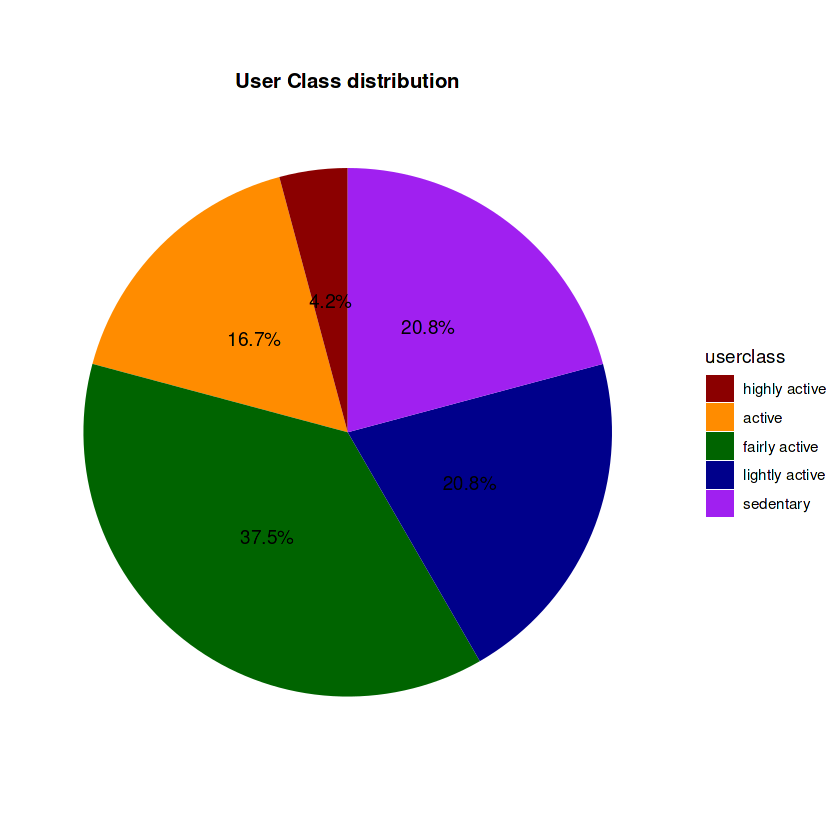

In [15]:
ggplot(daily_user_average_percent, aes(x = "", y = totalpercent, fill = userclass)) +
  geom_bar(stat = "identity", width = 1) + coord_polar("y", start = 0) + theme_minimal() + theme(axis.title.x = element_blank(), axis.title.y = element_blank(), axis.text.x = element_blank(), panel.grid = element_blank(), plot.title = element_text(hjust = 0.5, size=12, face = "bold")) + scale_fill_manual(values = c("darkred", "darkorange", "darkgreen", "darkblue", "purple")) + labs(title = "User Class distribution") + geom_text(aes(label = Labels), position = position_stack(vjust = 0.5))

### Classification of users per daily usage of Smart device

I calculated the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the duration of the survey is 31 days:

* High user — users who use their device for 21–31 days
* Moderate user — users who use their device for 10–20 days
* Low user — users who use their device for 1–10 days
Next, I created a new data frame grouping by id, calculated the number of days smart device was used and created a new column with the classification explained above.


In [16]:
daily_use <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(user_type= case_when(
    days_used >= 1 & days_used <= 10 ~ "low user",
    days_used >= 11 & days_used <= 20 ~ "moderate user", 
    days_used >= 21 & days_used <= 31 ~ "high user", 
  ))

head(daily_use)

id,days_used,user_type
<dbl>,<int>,<chr>
1503960366,25,high user
1644430081,4,low user
1844505072,3,low user
1927972279,5,low user
2026352035,28,high user
2320127002,1,low user


I created a table showing the percentage of each User type relative to the total number of users.

In [17]:
daily_use_percent <- daily_use %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

daily_use_percent$user_type <- factor(daily_use_percent$user_type, levels = c("high user", "moderate user", "low user"))

head(daily_use_percent)

user_type,total_percent,labels
<fct>,<dbl>,<chr>
high user,0.500,50%
low user,0.375,38%
moderate user,0.125,12%


Majority of the users are high users. I created a visualization of the dataframe using a pie chart

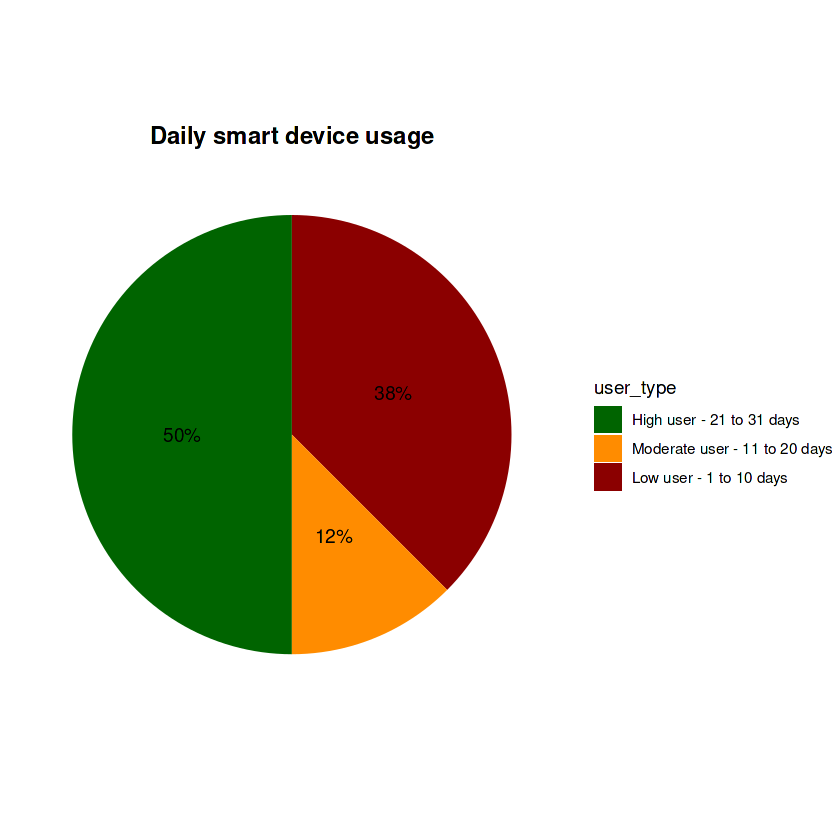

In [18]:
daily_use_percent %>%
  ggplot(aes(x = "",y = total_percent, fill = user_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c( "darkgreen","darkorange","darkred"),
                    labels = c("High user - 21 to 31 days",
                               "Moderate user - 11 to 20 days",
                               "Low user - 1 to 10 days"))+
  labs(title="Daily smart device usage")


* 50% of the Participants use their device frequently — between 21 to 31 days.
* 12% are moderate users (they use their device for 11 to 20 days).
* 38% of the Participants rarely used their device.

### Adding the user type and class to the daily_activity_sleep dataset

I merged the daily_activity_sleep dataset with the daily_average_user and the daily_use datasets

In [19]:
Daily_activity_sleep <- merge(daily_activity_sleep, daily_user_average, by=c ("id"))
Daily_activity_sleep <- merge(Daily_activity_sleep, daily_use, by=c ("id"))

head(Daily_activity_sleep)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,⋯,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,meandailysteps,meandailycalories,meandailysleep,userclass,days_used,user_type
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1985,1,327,346,12405.68,1872.28,360.28,active,25,high user
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,1797,2,384,407,12405.68,1872.28,360.28,active,25,high user
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1745,1,412,442,12405.68,1872.28,360.28,active,25,high user
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,1863,2,340,367,12405.68,1872.28,360.28,active,25,high user
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1728,1,700,712,12405.68,1872.28,360.28,active,25,high user
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,2035,1,304,320,12405.68,1872.28,360.28,active,25,high user


### Steps taken and Calories burned

I made a visualization to check if there’s a correlation between steps taken and the amount of calories burned.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


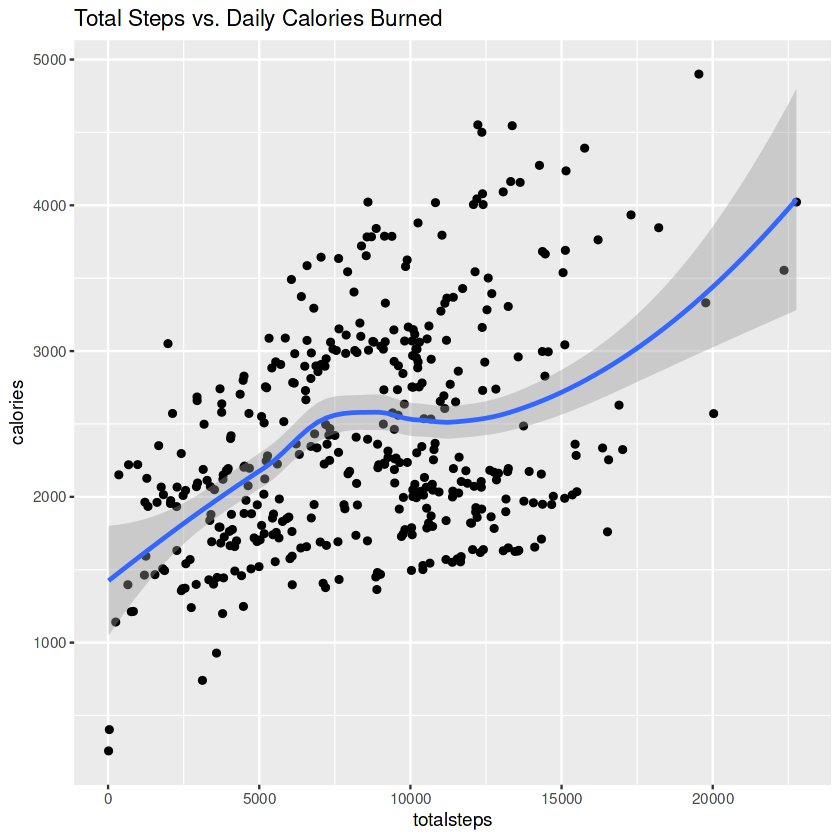

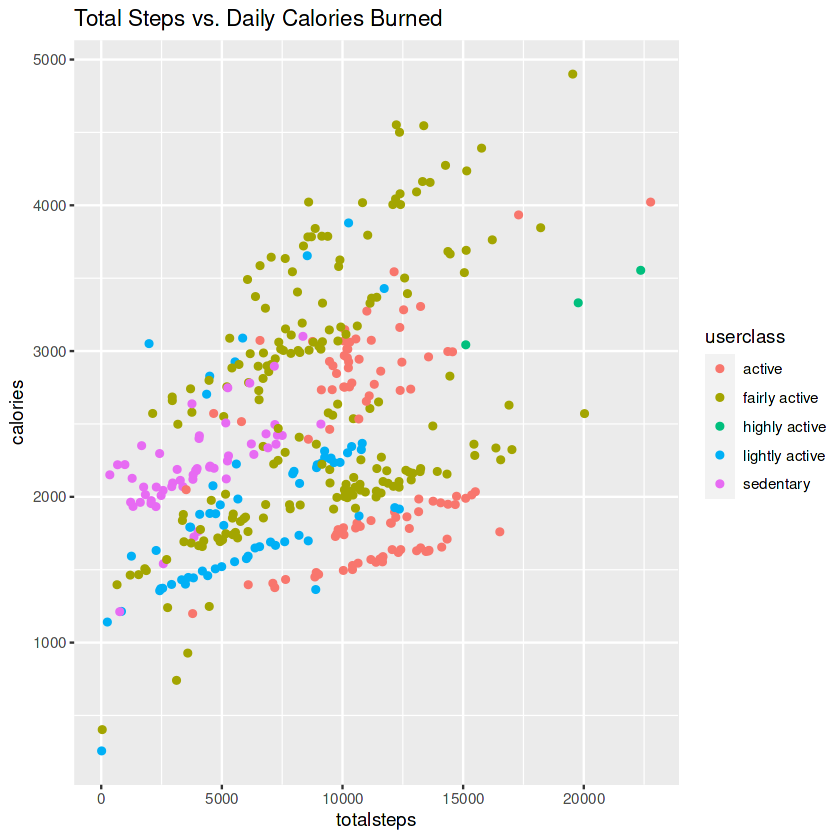

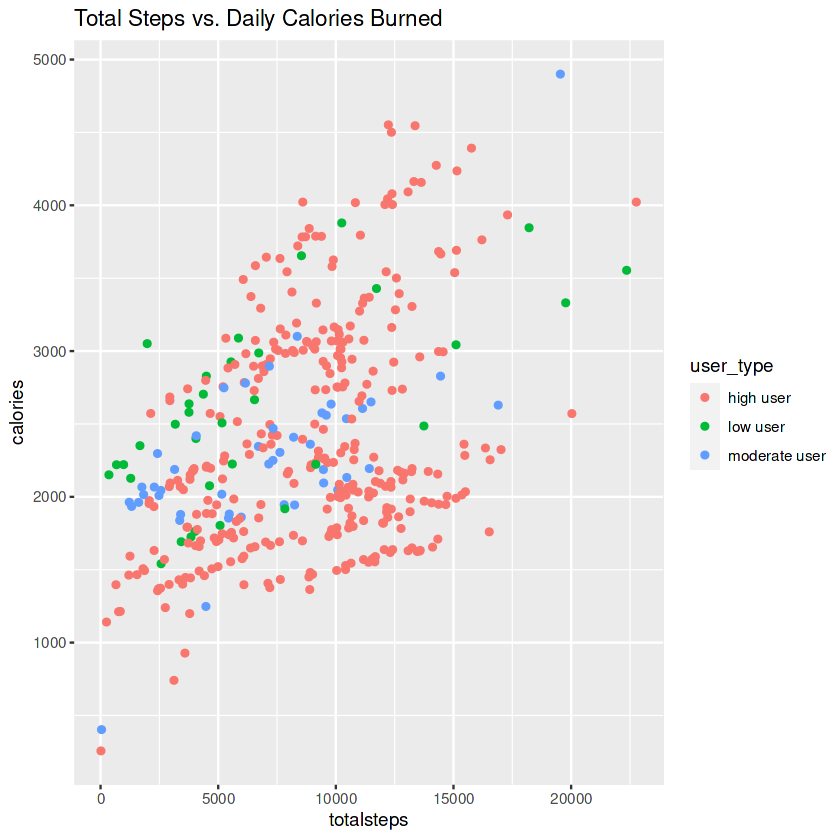

In [20]:
# finding the correlation between daily steps and daily calories burned

ggplot(data = daily_activity_sleep, aes(x = totalsteps, y = calories)) + 
  geom_point() + geom_smooth() + labs(title ="Total Steps vs. Daily Calories Burned")

# comparing the daily steps and daily calories burned between user class

ggplot(data = Daily_activity_sleep, aes(x = totalsteps, y = calories, color = userclass)) + 
  geom_point() + labs(title ="Total Steps vs. Daily Calories Burned")

# comparing the daily steps and daily calories burned between user type

ggplot(data = Daily_activity_sleep, aes(x = totalsteps, y = calories, color = user_type)) + 
  geom_point() + labs(title ="Total Steps vs. Daily Calories Burned")

* There is a positive correlation between total steps taken and the amount of calories burned
* The fairly active user class burns the most amount of calories
* The high user type burns the most amount of calories

From the analysis, in order to burn the most calories, users need to take at least 7500 steps daily and use smart devices for a minimum of 21 days per month.

### Daily Sleep and Calories burned

I made a visualization to check if there’s a correlation between amount of sleep taken daily and the amount of calories burned.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


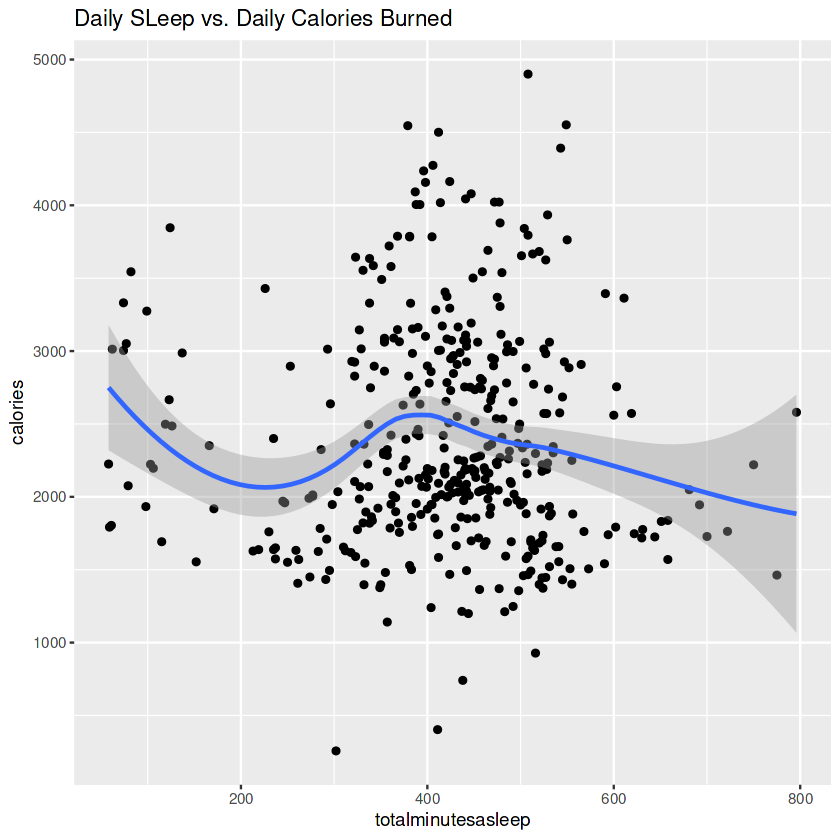

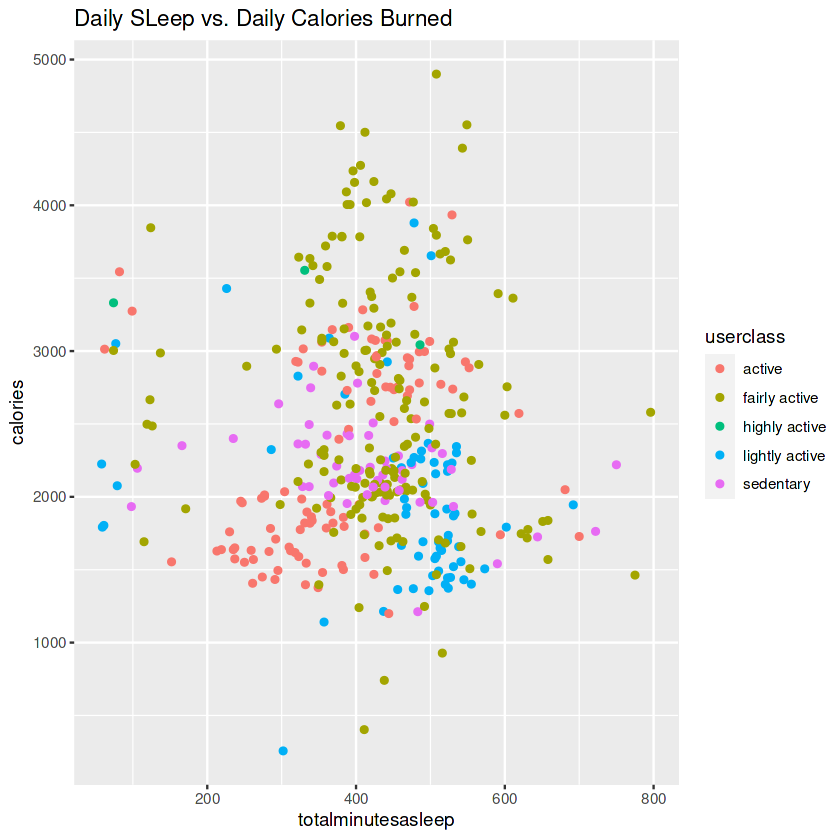

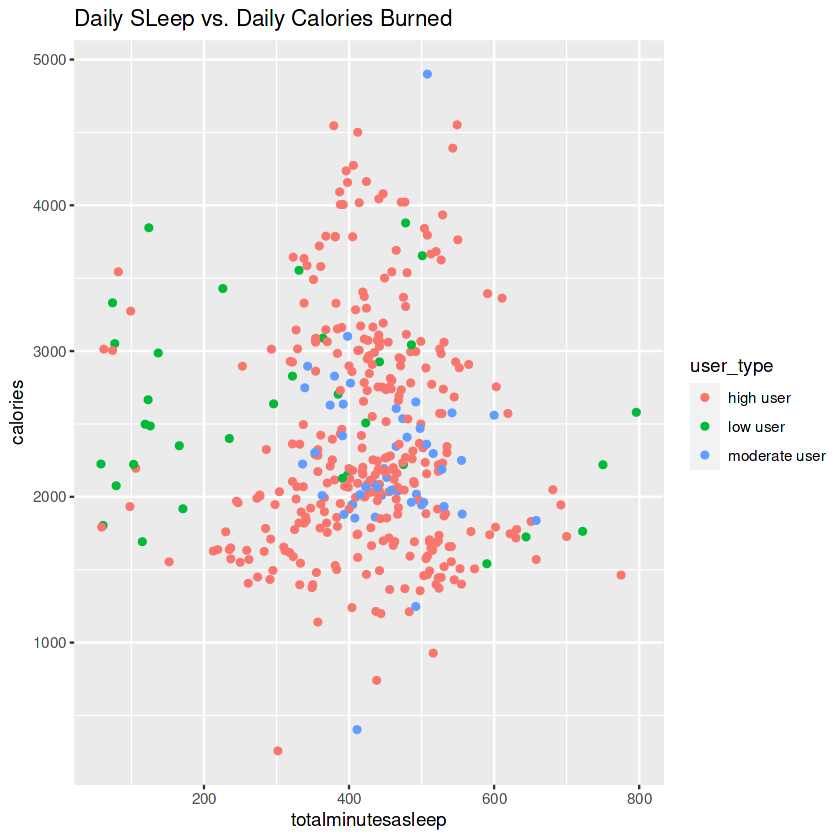

In [21]:
# finding the correlation between daily sleep and daily calories burned

ggplot(data = daily_activity_sleep, aes(x = totalminutesasleep, y = calories)) + 
  geom_point() + geom_smooth() + labs(title ="Daily SLeep vs. Daily Calories Burned")

# comparing the daily sleep and daily calories burned between user class

ggplot(data = Daily_activity_sleep, aes(x = totalminutesasleep, y = calories, color = userclass)) + 
  geom_point() + labs(title ="Daily SLeep vs. Daily Calories Burned")


# comparing the daily sleep and daily calories burned between user types

ggplot(data = Daily_activity_sleep, aes(x = totalminutesasleep, y = calories, color = user_type)) + 
  geom_point() + labs(title ="Daily SLeep vs. Daily Calories Burned")

* There is a negative correlation between total minutes asleep and the amount of calories burned
* The most amout of calories is burned between 400 and 550 minutes of sleep per day
(7-9). this means an adequate amount of sleep is required to burn the most calories


# Steps per weekday

I created a weekly_activity_sleep data set to determine the amount of steps and minutes of sleep users take in each weekday

In [22]:
weekday_activity_sleep <- daily_activity_sleep %>% 
  mutate(weekday = weekdays(date))

weekday_activity_sleep$weekday <- ordered(weekday_activity_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                                   "Friday", "Saturday", "Sunday"))

weekday_activity_sleep <- weekday_activity_sleep %>%
  group_by(weekday) %>%
  summarize(dailysteps = mean(totalsteps), dailySleep = mean(totalminutesasleep))

head(weekday_activity_sleep)

weekday,dailysteps,dailySleep
<ord>,<dbl>,<dbl>
Monday,9273.217,419.5000
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8183.516,401.2969
Friday,7901.404,405.4211
Saturday,9871.123,419.0702


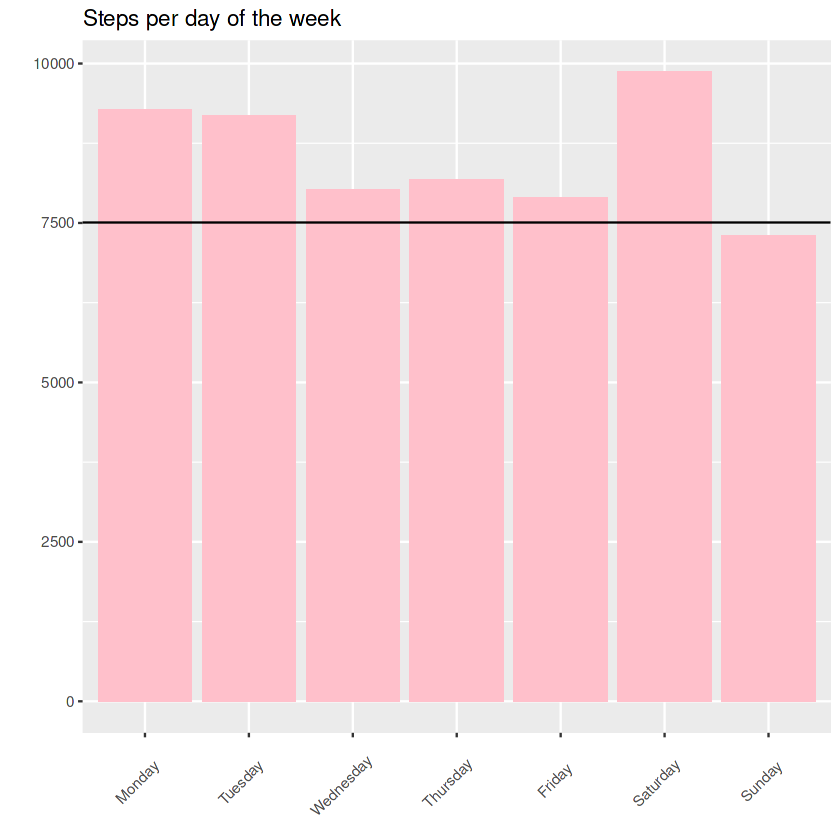

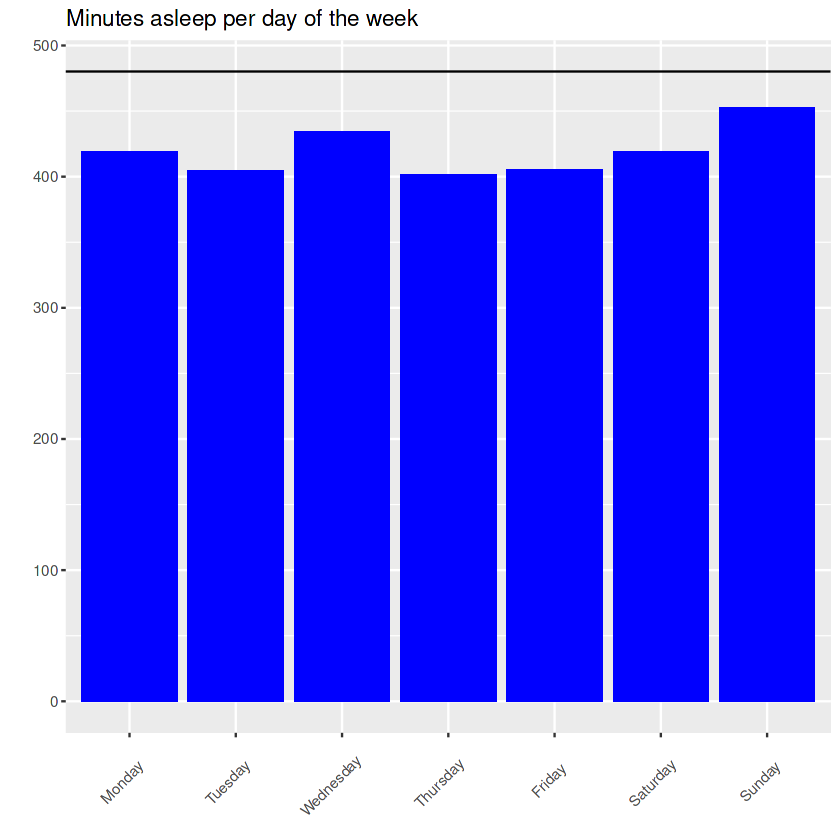

In [23]:
ggplot(weekday_activity_sleep) + geom_col(aes(weekday, dailysteps), fill = "pink") + geom_hline(yintercept = 7500) + labs(title = "Steps per day of the week", x = "", y = "") + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 0.7))

ggplot(weekday_activity_sleep) + geom_col(aes(weekday, dailySleep), fill = "blue") + geom_hline(yintercept = 480) + labs(title = "Minutes asleep per day of the week", x = "", y = "") + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 0.7))

* In the graphs above we can see that users don’t take the recommended amount of sleep of 8 hours.
* Users take recommended number of 7500 steps a day excepts for Sundays.

### Hourly Steps and Intensities

This shows what time of the day users are most active


### Separate the date and time columns

In [24]:
hourly_activity <- hourly_activity %>%
  separate(date_time, into = c("date", "time"), sep= " ")

head(hourly_activity)

,id,date,time,steptotal,totalintensity,averageintensity,calories
,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,1503960366,2016-04-12,00:00:00,373,20,0.333333,81
2,1503960366,2016-04-12,01:00:00,160,8,0.133333,61
3,1503960366,2016-04-12,02:00:00,151,7,0.116667,59
4,1503960366,2016-04-12,03:00:00,0,0,0.000000,47
5,1503960366,2016-04-12,04:00:00,0,0,0.000000,48
6,1503960366,2016-04-12,05:00:00,0,0,0.000000,48


I made a visualization showing the amount of steps taken, intensity and calories burned hourly

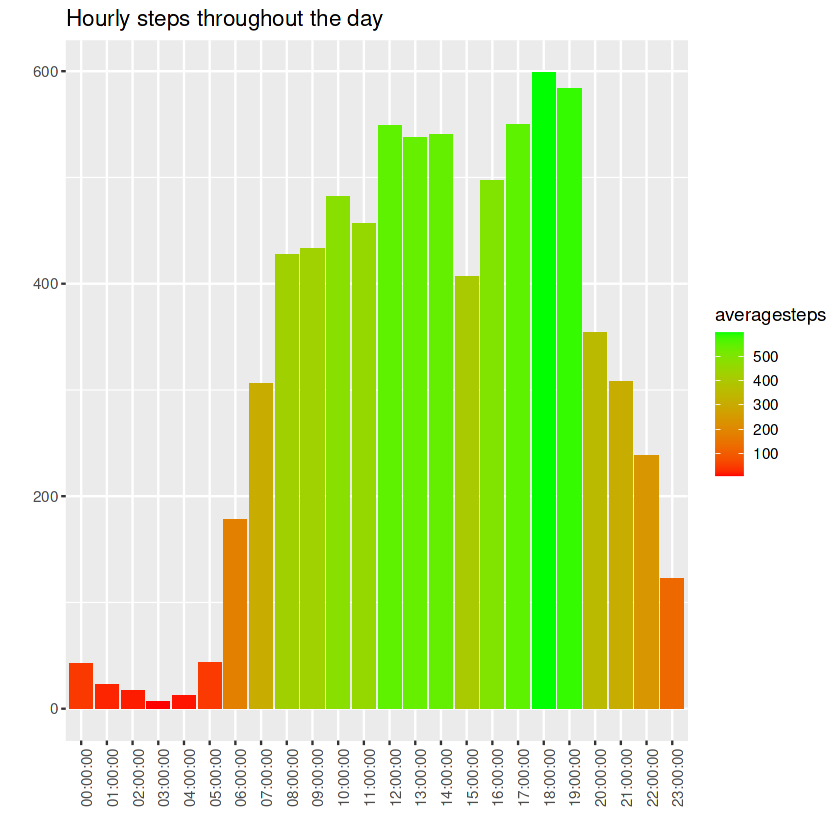

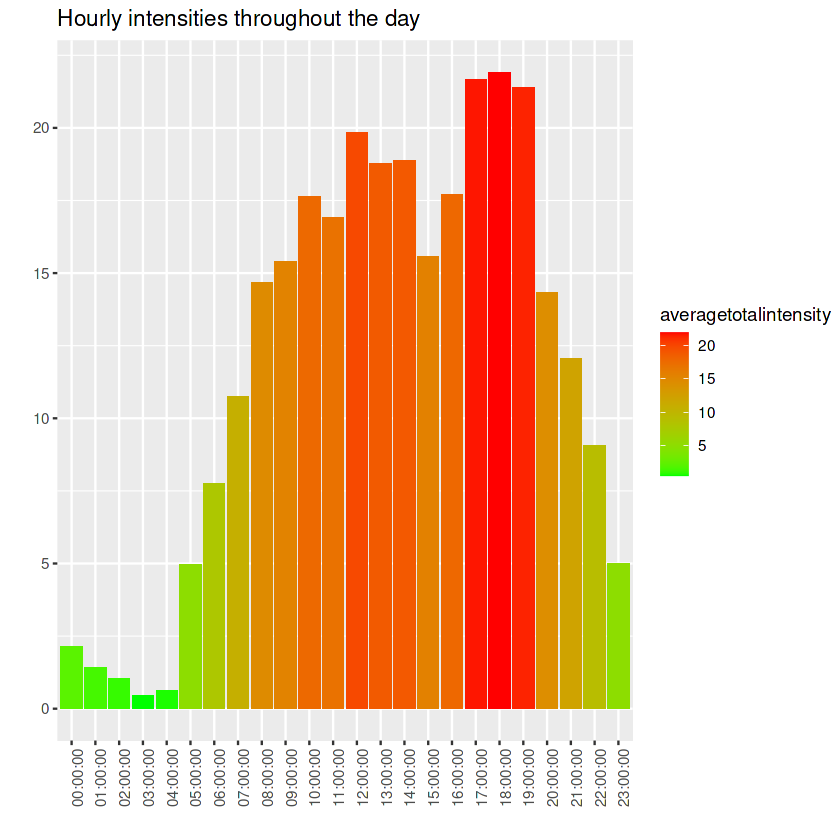

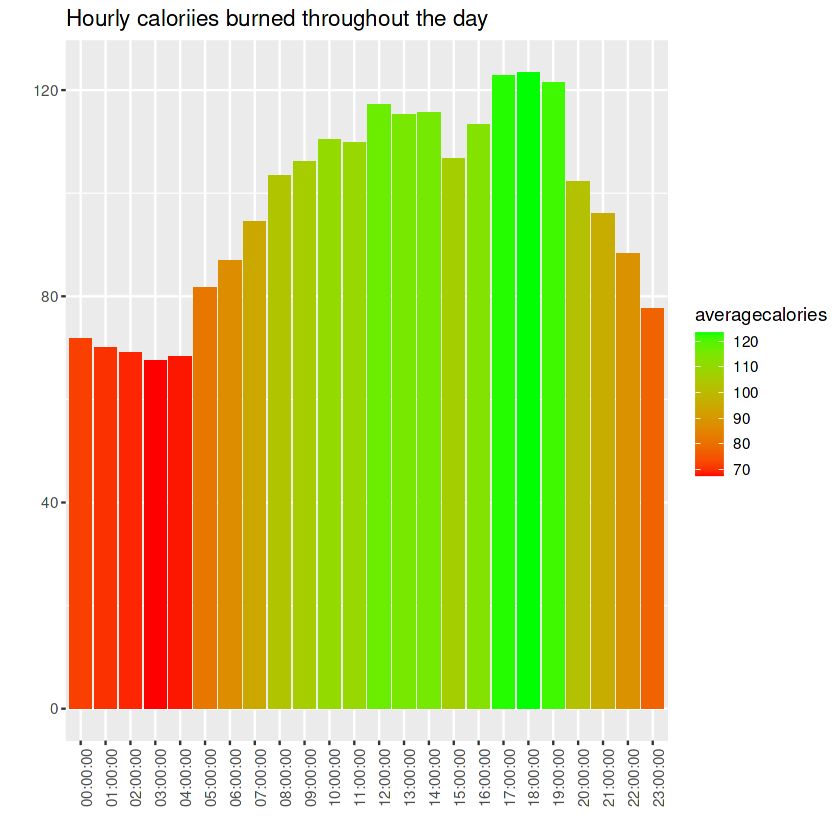

In [25]:
hourly_activity_average <- hourly_activity %>% 
  group_by(time) %>% 
  summarize(averagesteps = mean(steptotal), averagetotalintensity = mean(totalintensity), averagecalories = mean(calories)) 

ggplot(hourly_activity_average) + geom_col(aes(x = time, y = averagesteps, fill = averagesteps)) + labs(title = "Hourly steps throughout the day", x = "", y = "") + scale_fill_gradient(low = "red", high = "green") + theme(axis.text.x = element_text(angle = 90))


ggplot(hourly_activity_average) + geom_col(aes(x = time, y = averagetotalintensity, fill = averagetotalintensity)) + labs(title = "Hourly intensities throughout the day", x = "", y = "") + scale_fill_gradient(low = "green", high = "red") + theme(axis.text.x = element_text(angle = 90))

ggplot(hourly_activity_average) + geom_col(aes(x = time, y = averagecalories, fill = averagecalories)) + labs(title = "Hourly caloriies burned throughout the day", x = "", y = "") + scale_fill_gradient(low = "red", high = "green") + theme(axis.text.x = element_text(angle = 90))

Users seem to be lightly active between 5am and 7 am, active between 8 a.m. and 7 p.m and lightly active again by 8 pm



## Phase 6: Act


### Recommendations for Bellabeat

Based on our findings, I recommend conducting further analysis of Bellabeat’s tracking data to better address our business goals and support Bellabeat's mission. The current datasets may have biases and a small sample size.

**Key Trends and Suggestions for the Bellabeat App:**

1. **Daily Walk Reminders:**
   We can send regular reminders at particular times, like in the morning and evening, to urge people to walk more. We should also emphasise the advantages of taking regular walks, such as calorie burning and weight loss promotion.

2. **Reward System:**
  Users would be encouraged to keep active if interactive games were introduced that required them to walk a certain number of steps every day in order to advance to new levels. The app might have phases that are dependent on keeping up a specific daily step total for a set amount of time (like a month). At every level, users would receive awards that could be exchanged for savings on additional Bellabeat merchandise.

3. **Notification and Sleep Strategies:**
  Users don't get as much sleep as is advised, according to our data. Users could be able to specify a desired bedtime and receive notifications from the app a few minutes beforehand to help them get ready for bed. It might also offer information on the current temperature, suggested meals before bed, and good sleeping positions.

4. **Daily Step Count Notifications:**
 Bellabeat can motivate users by outlining these health advantages, encouraging them to take at least 7,500 steps a day. Notifications sent out over the day will encourage users to meet their step targets by keeping them informed of their progress.

5. **Personalized Notifications:**
   It's critical for people who are trying to lose weight to control their daily calorie consumption. With the Bellabeat app, users may efficiently limit their calorie intake by receiving personalized instructions and suggestions for low-calorie meal selections.

### Recommendations for the Online Campaign

Make sure the Bellabeat app is portrayed in the internet promotion as more than just a fitness tracker. It should be viewed as a thorough manual that assists users in striking a balance between their personal and professional life by adopting healthy routines. The ad should highlight how the app promotes a comprehensive approach to wellbeing by educating and motivating users through daily recommendations.

Thank you.